# Word embeddings

A word embedding is a high-dimensional latent space where words or phrases are represented as vectors. In this notebook we will determine the vectors for a couple of words. For visualization purposes, we will apply principal-component-analysis to these vectors and display the relationship of the words in two-dimensional space.

In [1]:
import openai
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

This helper functions will serve us to determine the vector for each word / text.

In [2]:
def embed(text):
    from openai import OpenAI
    client = OpenAI()

    response = client.embeddings.create(
        input=text,
        model="text-embedding-3-small"
    )
    return response.data[0].embedding

In [3]:
vector = embed("Hello world")
vector[:3]

[-0.002119065960869193, -0.04909009113907814, 0.02101006731390953]

In [4]:
len(vector)

1536

In [5]:
words = ["microscope", "cat", "fur", "black", "white"]

# Example of input dictionary
object_coords = {word: embed(word) for word in words}

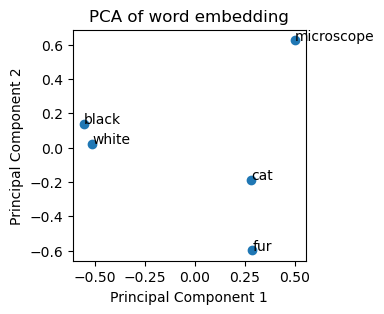

In [9]:
# Extract names and numerical lists
names = list(object_coords.keys())
data_matrix = np.array(list(object_coords.values()))

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
transformed_data = pca.fit_transform(data_matrix)

# Create scatter plot
plt.figure(figsize=(3, 3))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])

# Annotate data points with names
for i, name in enumerate(names):
    plt.annotate(name, (transformed_data[i, 0], transformed_data[i, 1]))

plt.title('PCA of word embedding')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Exercise
Draw an embedding for words such as "segmentation", "thresholding", "filtering", "convolution", "denoising", "measuring", "plotting". 
* Could you predict how the words are placed in this space? 
* Draw the same embedding again - is the visualization repeatable? 
* Change the order of the words in the list. Would you expect the visualization to change?
* Add words such as  "banana", "apple", "orange". Could you predict the view?